In [2]:
import pandas as pd
df = pd.read_csv("/Download Data - FUND_US_ARCX_SPY.csv")
df.columns=['time', 'open', 'high', 'low', 'close', 'volume']
#Check if NA values are in data
df=df[df['volume']!=0]
df.reset_index(drop=True, inplace=True)
df.isna().sum()
df.head(10)

,time,open,high,low,close,volume
0,05/01/2024,501.38,508.19,499.87,500.35,"80,242,844"
1,04/30/2024,508.56,509.56,501.98,501.98,"77,483,570"
2,04/29/2024,510.09,510.75,507.25,510.06,"46,415,449"
3,04/26/2024,506.35,509.88,505.70,508.26,"64,306,121"
4,04/25/2024,499.18,504.27,497.49,503.49,"69,122,367"
5,04/24/2024,506.56,507.37,503.13,505.41,"55,928,078"
6,04/23/2024,501.78,506.09,499.53,505.65,"64,633,621"
7,04/22/2024,497.83,502.38,495.43,499.72,"67,961,047"
8,04/19/2024,499.44,500.46,493.86,495.16,"102,212,602"
9,04/18/2024,501.98,504.13,498.56,499.52,"74,548,086"


In [3]:
def pivotid(df1, l, n1, n2): #n1 n2 before and after candle l
    if l-n1 < 0 or l+n2 >= len(df1):
        return 0

    pividlow=1
    pividhigh=1
    for i in range(l-n1, l+n2+1):
        if(df1.low[l]>df1.low[i]):
            pividlow=0
        if(df1.high[l]<df1.high[i]):
            pividhigh=0
    if pividlow and pividhigh:
        return 3
    elif pividlow:
        return 1
    elif pividhigh:
        return 2
    else:
        return 0

df['pivot'] = df.apply(lambda x: pivotid(df, x.name,10,10), axis=1)

In [4]:
df


,time,open,high,low,close,volume,pivot
0,05/01/2024,501.38,508.19,499.87,500.35,"80,242,844",0
1,04/30/2024,508.56,509.56,501.98,501.98,"77,483,570",0
2,04/29/2024,510.09,510.75,507.25,510.06,"46,415,449",0
3,04/26/2024,506.35,509.88,505.70,508.26,"64,306,121",0
4,04/25/2024,499.18,504.27,497.49,503.49,"69,122,367",0
...,...,...,...,...,...,...,...
248,05/05/2023,408.91,413.72,408.64,412.63,"87,891,789",0
249,05/04/2023,406.93,407.27,403.74,405.13,"94,901,859",0
250,05/03/2023,411.36,413.87,407.77,408.02,"91,531,766",0
251,05/02/2023,414.77,414.82,407.82,410.84,"103,998,492",0


In [5]:
import numpy as np
def pointpos(x):
    if x['pivot']==1:
        return x['low']-1e-3
    elif x['pivot']==2:
        return x['high']+1e-3
    else:
        return np.nan

df['pointpos'] = df.apply(lambda row: pointpos(row), axis=1)

In [6]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
dfpl = df[-300:-1]
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['open'],
                high=dfpl['high'],
                low=dfpl['low'],
                close=dfpl['close'],
                increasing_line_color= 'green',
                decreasing_line_color= 'red')])

fig.add_scatter(x=dfpl.index, y=dfpl['pointpos'], mode="markers",
                marker=dict(size=5, color="MediumPurple"),
                name="pivot")
fig.update_layout(xaxis_rangeslider_visible=False)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_layout(paper_bgcolor='black', plot_bgcolor='black')

fig.show()

High values:
23     524.61
135    438.14
166    453.67
192    459.44
Name: high, dtype: float64
Low values:
80     466.43
127    409.21
145    420.18
176    433.01
Name: low, dtype: float64
Number of bins: 7


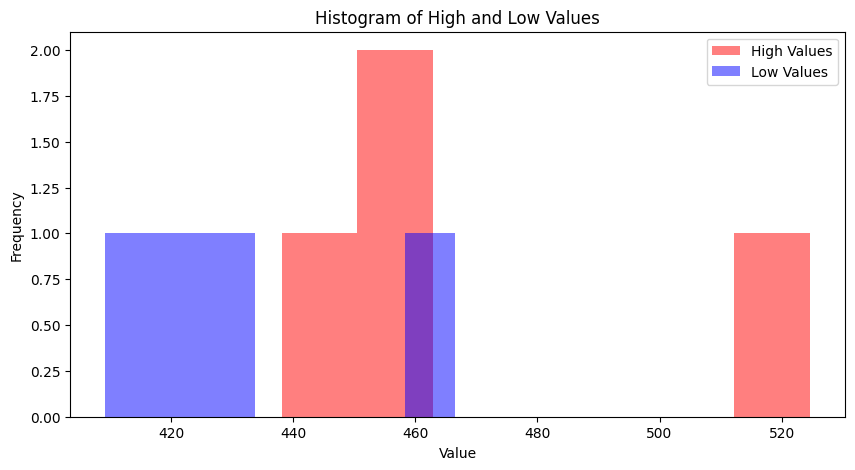

In [16]:
import matplotlib.pyplot as plt

dfkeys = df[:]

high_values = dfkeys[dfkeys['pivot'] == 2]['high']
low_values = dfkeys[dfkeys['pivot'] == 1]['low']

print("High values:")
print(high_values.head())
print("Low values:")
print(low_values.head())

bin_width = 15
bins = int((high_values.max() - low_values.min()) / bin_width)
print("Number of bins:", bins)

plt.figure(figsize=(10, 5))
plt.hist(high_values, bins=bins, alpha=0.5, label='High Values', color='red')
plt.hist(low_values, bins=bins, alpha=0.5, label='Low Values', color='blue')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of High and Low Values')
plt.legend()
plt.show()
